<a href="https://colab.research.google.com/github/jmlucasusc4/Credit_Card_Fraud/blob/main/Credit_Card_Fraud_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the Libraries



In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# configure pandas display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

###Load Dataset

In [ ]:
dataset = pd.read_csv('/content/creditcard.csv')

###Preliminary Data Exploration

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.shape

(284807, 31)

###Extract Numerical Columns

In [ ]:
dataset_numerical_features = [col for col in dataset.columns if dataset[col].dtype == 'float64'] 

dataset_numerical_features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

###Remove unnecessary columns

In [ ]:
# check after removing the column label
dataset_numerical_features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
# extract the numerical only dataset
numerical_features_datset = dataset[dataset_numerical_features]

In [ ]:
numerical_features_datset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


###Check for and fill missing values

In [ ]:
numerical_features_datset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [ ]:
for col in dataset_numerical_features:
    numerical_features_datset[col] = numerical_features_datset[col].fillna(numerical_features_datset[col].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
numerical_features_datset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

###Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(numerical_features_datset)

MinMaxScaler()

In [ ]:
# get scaled data 
dataset_scaled = pd.DataFrame(min_max_scaler.transform(numerical_features_datset))

# assign column labels
dataset_scaled.columns = dataset_numerical_features

In [ ]:
dataset_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.548717,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,0.508722,0.285286,0.704193,0.448331,0.646053,0.336327,0.449352,0.731130,0.653292,0.563315,0.580265,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439
std,0.274828,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,0.060698,0.037660,0.077041,0.032231,0.068426,0.027866,0.024678,0.057647,0.063570,0.008208,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313681,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,0.497644,0.239943,0.688907,0.398130,0.631744,0.292753,0.434468,0.717074,0.618983,0.527682,0.578011,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,0.000218
50%,0.490138,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,0.283338,0.709471,0.447281,0.647755,0.339921,0.451464,0.729221,0.653042,0.563606,0.579600,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856
75%,0.806290,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518113,0.329266,0.727494,0.499613,0.662635,0.384831,0.465994,0.742743,0.687736,0.599155,0.581682,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,0.003004
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


PCA

In [ ]:
# import PCA from decomposition
from sklearn.decomposition import PCA

# create the PCA object to use to fit the given data
pca = PCA()

# fit the PCA with the given cleaned-up data
pca.fit(dataset_scaled)

PCA()

In [ ]:
# Principal axes in feature space, representing the directions of maximum variance in the data.
print(pca.components_)

[[-9.94793310e-01 -1.42044030e-02  6.63576210e-04  3.98669881e-02
   2.49622845e-02 -5.76912908e-03  3.03187324e-03 -2.28930110e-03
   1.69985384e-03  1.19684765e-03 -2.48814334e-03  5.66046184e-02
  -1.70981559e-02  1.97274597e-02  1.15632809e-02  4.79216017e-02
  -1.20075420e-03  6.53376743e-03 -1.95319357e-02 -6.96950790e-03
   1.49758172e-03 -1.90151880e-03 -1.77421173e-02 -1.70145184e-03
   5.18472288e-03  2.47157365e-02  1.27220448e-02  1.37182440e-04
   2.26061436e-04  3.79014060e-04]
 [ 4.02136203e-03  7.69880003e-04 -4.04272619e-05 -2.04685554e-03
  -2.67184700e-03  2.67291607e-04 -1.41422429e-04  1.09469879e-04
  -8.17167586e-05 -7.11392384e-05  1.21795313e-04 -5.58567891e-03
   9.87199526e-04 -7.75208017e-03 -6.24851700e-04 -7.01906947e-03
   6.22125314e-05 -3.30271459e-04  1.73086994e-03  7.69854794e-04
  -6.75905086e-05  9.09085963e-05  9.75449398e-04  7.88393295e-05
   9.99880016e-01 -1.30035791e-03 -7.94326014e-03 -6.21644456e-06
  -1.04761571e-05  5.87236759e-04]
 [ 9.2

In [ ]:
# check the shape 
print(pca.components_.shape)

(30, 30)


In [ ]:
# check the type 
print(type(pca.components_))

<class 'numpy.ndarray'>


In [ ]:
# Percentage of variance explained by each of the selected components
print(pca.explained_variance_)

[7.62983021e-02 6.65884235e-03 6.19656288e-03 5.91375506e-03
 4.56419327e-03 4.03952454e-03 3.91611685e-03 3.46016054e-03
 3.24660531e-03 1.43248413e-03 1.40043786e-03 1.13346638e-03
 1.09848502e-03 1.02978473e-03 8.26218983e-04 7.76464205e-04
 6.12685365e-04 5.16676348e-04 4.86827772e-04 3.36402576e-04
 1.83284563e-04 1.64687389e-04 1.41559093e-04 1.05564044e-04
 8.60289969e-05 7.34542550e-05 5.91968982e-05 5.54942163e-05
 4.48625742e-05 4.36952130e-06]


In [ ]:
print(len(pca.explained_variance_))

30


In [ ]:
print(pca.singular_values_)

[147.4117167   43.54857352  42.0097404   41.03989429  36.05425951
  33.91873859  33.39661025  31.39226789  30.40810207  20.19851668
  19.97130707  17.96713742  17.68771111  17.12567868  15.33988669
  14.87083267  13.20971112  12.130644    11.7750359    9.7882313
   7.22499434   6.84864632   6.3495574    5.48318094   4.94990651
   4.57386189   4.10604819   3.97556106   3.5745112    1.11555631]


In [ ]:
print(pca.mean_)

[0.54871672 0.95829378 0.76725837 0.83741363 0.2519302  0.7657163
 0.26301976 0.26535552 0.78538548 0.46277991 0.50872198 0.28528563
 0.70419265 0.4483309  0.64605314 0.33632729 0.44935188 0.73112974
 0.65329207 0.56331483 0.58026532 0.5614795  0.510031   0.66543361
 0.38223415 0.57790656 0.42544834 0.41651095 0.31312386 0.00343891]


In [ ]:
print(pca.noise_variance_)

0.0


In [ ]:
principal_components = pca.fit_transform(dataset_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(284807, 30)


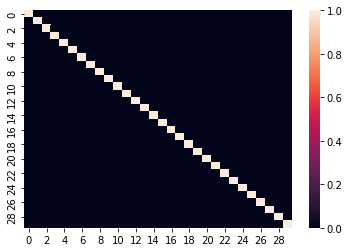

In [ ]:
import seaborn as sns

sns.heatmap(principal_components_df.corr())

###Choosing the Number of Principal Components

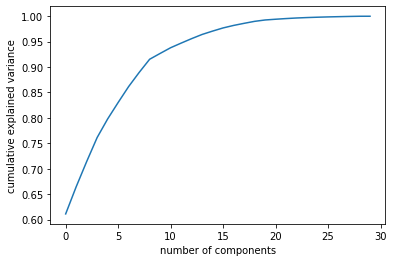

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

###PCA for Dimensionality Reduction

In [ ]:
pca_low_dim = PCA(n_components = 3)

In [ ]:
pca_low_dim.fit(dataset_scaled)

PCA(n_components=3)

In [ ]:
# original components
print(dataset_scaled.shape)

# transformed components
print(pca_low_dim.transform(dataset_scaled).shape)

(284807, 30)
(284807, 3)


In [ ]:
print(pca_low_dim.explained_variance_)

[0.0762983  0.00665884 0.00619656]


In [ ]:
print(pca_low_dim.explained_variance_.sum())

0.08915370655028877
